# NYC taxi trip data analysis
Data: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

Data dictionary: https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

In [54]:
from sqlalchemy import create_engine
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
conn_string = os.getenv('GE_DEMO_DB')


In [55]:
df_jan = pd.read_sql_table('yellow_tripdata_sample_2019_01', conn_string)
df_jan

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-01-05 06:36:51,2019-01-05 06:50:42,1.0,3.72,1,N,68.0,236.0,1,14.0,0.0,0.5,1.00,0.0,0.3,15.80,NaN
1,1,2019-01-23 15:22:13,2019-01-23 15:32:50,1.0,3.30,1,N,12.0,232.0,2,12.5,0.0,0.5,0.00,0.0,0.3,13.30,0.0
2,2,2019-01-04 10:54:47,2019-01-04 11:18:31,2.0,3.09,1,N,234.0,236.0,1,17.0,0.0,0.5,3.56,0.0,0.3,21.36,NaN
3,1,2019-01-05 12:07:08,2019-01-05 12:14:06,1.0,1.00,1,N,25.0,49.0,1,6.0,0.0,0.5,1.35,0.0,0.3,8.15,NaN
4,2,2019-01-04 18:23:00,2019-01-04 18:25:22,5.0,0.41,1,N,151.0,151.0,1,3.5,1.0,0.5,0.80,0.0,0.3,6.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,2019-01-22 15:05:04,2019-01-22 15:15:49,1.0,1.10,1,N,261.0,231.0,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80,0.0
9996,1,2019-01-14 08:47:03,2019-01-14 09:13:05,1.0,2.50,1,N,237.0,107.0,2,16.5,0.0,0.5,0.00,0.0,0.3,17.30,NaN
9997,1,2019-01-21 13:38:03,2019-01-21 13:42:05,1.0,0.60,1,N,237.0,237.0,2,5.0,0.0,0.5,0.00,0.0,0.3,5.80,0.0
9998,1,2019-01-25 19:24:39,2019-01-25 19:35:29,1.0,1.40,1,N,230.0,143.0,1,8.5,1.0,0.5,2.55,0.0,0.3,12.85,0.0


In [56]:
df_jan.groupby('passenger_count').count()

,vendor_id,pickup_datetime,dropoff_datetime,trip_distance,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
passenger_count,,,,,,,,,,,,,,,,,
1.0,7299,7299,7299,7299,7299,7299,7299,7299,7299,7299,7299,7299,7299,7299,7299,7299,2727
2.0,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,510
3.0,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,132
4.0,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,74
5.0,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,143
6.0,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,87


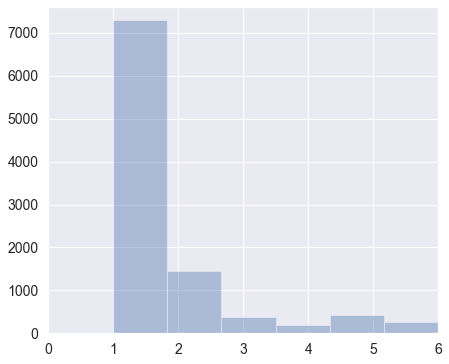

In [68]:
plt.rcParams['figure.figsize'] = [7,6]

def plot_passenger_count(df, bins):
    label_size = 18
    tick_size = 14
    sns.distplot(df[['passenger_count']], bins=bins, kde=False)
#     plt.ylabel('Number of taxi rides', size=label_size)
#     plt.xlabel('Number of passengers per taxi ride', size=label_size)
    plt.xticks(size=tick_size)
    plt.yticks(size=tick_size)
    plt.xlim(0,6)
    plt.ylim(0, 7600)
    plt.show()
    
plot_passenger_count(df_jan, 6)

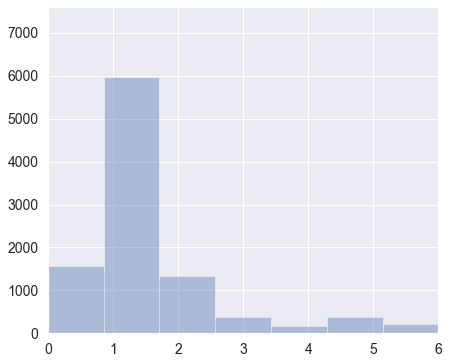

In [69]:
df_feb = pd.read_sql_table('yellow_tripdata_staging', conn_string)
plot_passenger_count(df_feb, 7)